In [1]:
# Import necessary libraries
import numpy as np
import random
import math
import matplotlib.pyplot as plt

d:\softwares\Python\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
d:\softwares\Python\lib\site-packages\numpy\.libs\libopenblas.EL2C6PLE4ZYW3ECEVIV3OXXGRN2NRFM2.gfortran-win_amd64.dll
d:\softwares\Python\lib\site-packages\numpy\.libs\libopenblas.FB5AE2TYXYH2IJRDKGDGQ3XBKLKTF43H.gfortran-win_amd64.dll
d:\softwares\Python\lib\site-packages\numpy\.libs\libopenblas.WCDJNK7YVMPZQ2ME2ZZHJJRJ3JIKNDB7.gfortran-win_amd64.dll
d:\softwares\Python\lib\site-packages\numpy\.libs\libopenblas64__v0.3.21-gcc_10_3_0.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


## (A) getData function:
This function generates a dataset based on the given distribution.
It generates random values for X in the range (0, 1) and calculates corresponding Y values using the given formula.

In [2]:
# Function to generate the dataset
def getData(sd, N):
    X = np.random.uniform(0, 1, N)  # Generate N random numbers between 0 and 1
    Z = np.random.normal(0, sd, N)  # Generate N random numbers from a normal distribution with mean 0 and variance sd^2
    Y = np.cos(2 * math.pi * X) + Z  # Calculate Y using the given formula
    return np.vstack((X, Y)).T  # Return the dataset as a NumPy array

## (B) getMSE function:
This calculates the Mean Squared Error (MSE) given the predicted y_pred and the actual y.

In [3]:
# Function to calculate the mean squared error
def getMSE(y_pred, y):
    mse = np.mean((y - y_pred) ** 2)  # Calculate mean squared error
    return mse

## (C) GD, SGD, and Mini_batch functions:
These functions perform gradient descent (GD), stochastic gradient descent (SGD), mini-batch gradient descent, and mini-batch gradient descent without regularization, respectively. They update the model weights using the gradients and return the final weights and the mean squared error (Ein) for the training dataset.

In [4]:
# Gradient Descent (GD) optimization method
def GD(X, y, n, weights):
    itr = 2000  # Number of iterations for gradient descent
    lrate = 0.001  # Learning rate
    Ein_list = np.zeros(itr)  # Array to store Ein for each iteration
    Ein = 0

    # Gradient Descent iteration
    for i in range(itr):
        # Update weights using the gradient descent update rule
        weights -= lrate * (2 / n) * (((X.dot(weights) - y).T).dot(X).T)
        # Calculate Ein and store it in the list
        Ein_list[i] = getMSE(X.dot(weights), y)

    Ein = Ein_list[itr - 1]  # Ein after the final iteration
    return weights, Ein


# Stochastic Gradient Descent (SGD) optimization method
def SGD(X, Y, n, weights):
    itr = 2000  # Number of iterations for stochastic gradient descent
    lrate = 0.001  # Learning rate
    Ein_list = np.zeros(itr)  # Array to store Ein for each iteration
    Ein = 0

    # Stochastic Gradient Descent iteration
    for i in range(itr):
        random_index = random.randint(0, n - 1)  # Choose a random data point
        x = X[random_index].reshape(-1, 1)
        y = Y[random_index].reshape(-1, 1)
        # Update weights using the stochastic gradient descent update rule
        weights -= lrate * (2 / n) * (((x * weights - y)) * x)
        # Calculate Ein and store it in the list
        Ein_list[i] = getMSE(X.dot(weights), Y)

    Ein = Ein_list[itr - 1]  # Ein after the final iteration
    return weights, Ein

# Mini-batch Gradient Descent optimization method
def Mini_batch(X, Y, n, weights):
    itr = 2000  # Number of iterations for mini-batch gradient descent
    lrate = 0.001  # Learning rate
    batch_size = 50  # Batch size
    Ein_list = np.zeros(itr)  # Array to store Ein for each iteration
    Ein = 0

    # Mini-batch Gradient Descent iteration
    for i in range(itr):
        if batch_size >= n:
            x = X
            y = Y
            batch_size = n
        else:
            random_index = random.randint(0, n - batch_size)  # Choose a random starting index
            x = X[random_index:random_index + batch_size]
            y = Y[random_index:random_index + batch_size]
        
        # Update weights using the mini-batch gradient descent update rule
        weights -= lrate * (2 / batch_size) * ((x.dot(weights) - y).T.dot(x).T)
        # Calculate Ein and store it in the list
        Ein_list[i] = getMSE(X.dot(weights), Y)

    Ein = Ein_list[itr - 1]  # Ein after the final iteration
    return weights, Ein

## (D) fitData function:
This function fits the given data to a polynomial of degree d. It prepares the feature matrix X with polynomial features and initializes weights. It then calls the appropriate optimization function (GD, SGD, Mini_batch) based on the setter argument to fit the data and return the final weights and Ein.

In [5]:
# Function to fit the data to a polynomial using the specified optimization method
def fitData(data, d, setter):
    y = data[:, 1].reshape((len(data), 1))
    x = data[:, 0]
    X = np.ones((1, len(data)))

    # Generate the feature matrix with polynomial features
    for i in range(d):
        X = np.vstack((X, x ** (i + 1)))
    X = X.T

    # Initialize weights randomly
    weights = np.random.random([d + 1, 1])
    n = len(data)  # Number of data points

    # Choose the optimization method based on the setter value
    if setter == 1:
        weights, Ein = GD(X, y, n, weights)
    elif setter == 2:
        weights, Ein = SGD(X, y, n, weights)
    else:
        weights, Ein = Mini_batch(X, y, n, weights)

    return weights, Ein

In [6]:
# Function to test the model using a separate testing dataset and calculate Eout
def testing(tdata, weights, d):
    n = len(tdata)
    y = tdata[:, 1].reshape((n, 1))
    x = tdata[:, 0]
    X = np.ones((1, n))

    # Generate the feature matrix with polynomial features
    for i in range(d):
        X = np.vstack((X, x ** (i + 1)))
    X = X.T

    # Calculate Eout (mean squared error on the testing dataset)
    Eout = getMSE(X.dot(weights), y)
    return Eout

## (E) experiment function:
This function runs the experiment by generating datasets with noise, fitting them to polynomials of a specified degree, and calculating Ein, Eout, and Ebias. It averages these values over multiple trials.

In [7]:
# Function to run experiments for different dataset sizes, noise levels, and model degrees
def experiment(N, sd, d, setter):
    m = 50  # Number of trials for each experiment
    Ein_list = []
    Eout_list = []
    weight_list = []

    # Run the experiment for 'm' trials
    for i in range(m):
        # Generate a training dataset
        tempdata = getData(sd, N)
        # Fit the training data to a polynomial of degree 'd'
        temp_weight, temp_Ein = fitData(tempdata, d, setter)
        # Generate a separate testing dataset
        temp_test_data = getData(sd, 1000)
        # Calculate Eout for the testing dataset
        temp_Eout = testing(temp_test_data, temp_weight, d)

        # Append Ein, Eout, and weights for this trial
        Ein_list.append(temp_Ein)
        Eout_list.append(temp_Eout)
        weight_list.append(temp_weight)

    # Calculate average Ein, Eout, and weights over all trials
    Ein_avg = np.mean(Ein_list)
    Eout_avg = np.mean(Eout_list)
    weights_avg = np.mean(weight_list, axis=0)

    # Calculate Ebias using a larger dataset
    tempdata = getData(sd, 2000)
    Ebias = testing(tempdata, weights_avg, d)
    Egen = abs(Ein_avg - Eout_avg)  # Calculate generalization error
    return Ein_avg, Eout_avg, Ebias, Egen

## Results and Plots:

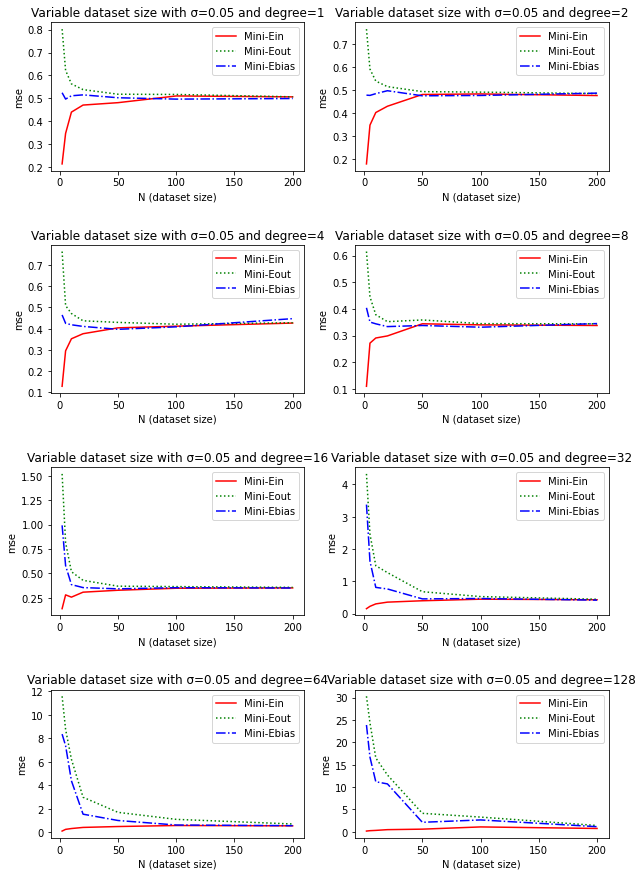

In [8]:
# For variance = 0.05
# List of dataset sizes (N)
N = [2, 5, 10, 20, 50, 100, 200]

# List of model degrees (D)
Deg = [1, 2, 4, 8, 16, 32, 64, 128]

# Create lists to store results for plotting
Mini_list = [[], [], []]

# Create subplots for the plots
fig, axes = plt.subplots(4, 2, figsize=(10, 15))
fig.subplots_adjust(hspace=0.5)  # Adjust vertical spacing between subplots

# Iterate over different degrees (D)
for i, D in enumerate(Deg):
    Mini_list = [[], [], []]

    # Iterate over different dataset sizes (N)
    for j, n in enumerate(N):
        # Run the experiment for given dataset size, noise level, and model degree
        Ein, Eout, Ebias, Egen = experiment(n, 0.05, D, 3)
        Mini_list[0].append(Ein)
        Mini_list[1].append(Eout)
        Mini_list[2].append(Ebias)

    # Determine the position of the subplot in the grid
    row = i // 2
    col = i % 2

    # Plot Ein, Eout, and Ebias for different dataset sizes
    axes[row, col].plot(N, Mini_list[0], color='r', linestyle='solid', label='Mini-Ein')
    axes[row, col].plot(N, Mini_list[1], color='g', linestyle='dotted', label='Mini-Eout')
    axes[row, col].plot(N, Mini_list[2], color='b', linestyle='dashdot', label='Mini-Ebias')
    title = f'Variable dataset size with σ=0.05 and degree={D}'
    axes[row, col].set_title(title)
    axes[row, col].set_xlabel('N (dataset size)')
    axes[row, col].set_ylabel('mse')
    axes[row, col].legend()

# Show the plots
plt.show()

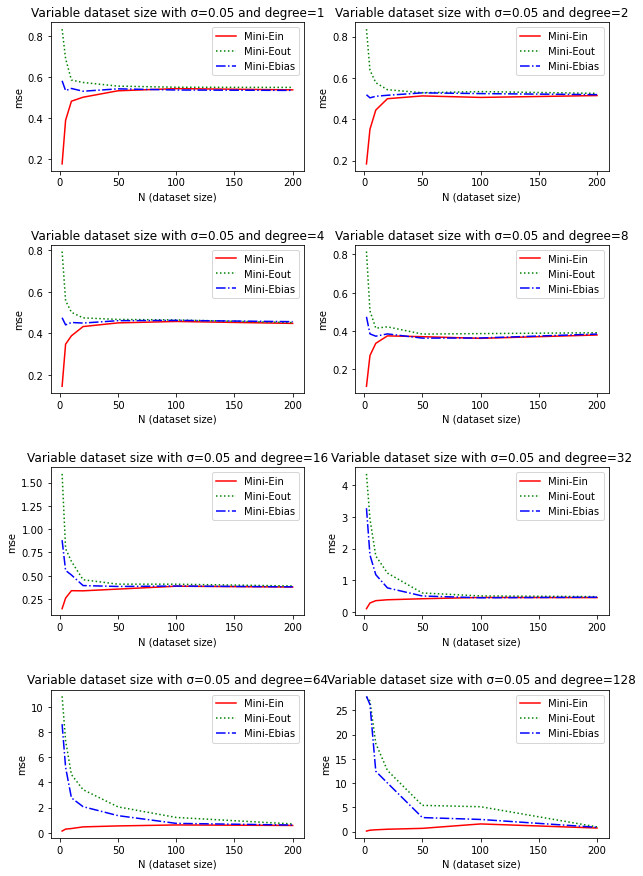

In [9]:
# For variance = 0.2
# List of dataset sizes (N)
N = [2, 5, 10, 20, 50, 100, 200]

# List of model degrees (D)
Deg = [1, 2, 4, 8, 16, 32, 64, 128]

# Create lists to store results for plotting
Mini_list = [[], [], []]

# Create subplots for the plots
fig, axes = plt.subplots(4, 2, figsize=(10, 15))
fig.subplots_adjust(hspace=0.5)  # Adjust vertical spacing between subplots

# Iterate over different degrees (D)
for i, D in enumerate(Deg):
    Mini_list = [[], [], []]

    # Iterate over different dataset sizes (N)
    for j, n in enumerate(N):
        # Run the experiment for given dataset size, noise level, and model degree
        Ein, Eout, Ebias, Egen = experiment(n, 0.2, D, 3)
        Mini_list[0].append(Ein)
        Mini_list[1].append(Eout)
        Mini_list[2].append(Ebias)

    # Determine the position of the subplot in the grid
    row = i // 2
    col = i % 2

    # Plot Ein, Eout, and Ebias for different dataset sizes
    axes[row, col].plot(N, Mini_list[0], color='r', linestyle='solid', label='Mini-Ein')
    axes[row, col].plot(N, Mini_list[1], color='g', linestyle='dotted', label='Mini-Eout')
    axes[row, col].plot(N, Mini_list[2], color='b', linestyle='dashdot', label='Mini-Ebias')
    title = f'Variable dataset size with σ=0.05 and degree={D}'
    axes[row, col].set_title(title)
    axes[row, col].set_xlabel('N (dataset size)')
    axes[row, col].set_ylabel('mse')
    axes[row, col].legend()

# Show the plots
plt.show()

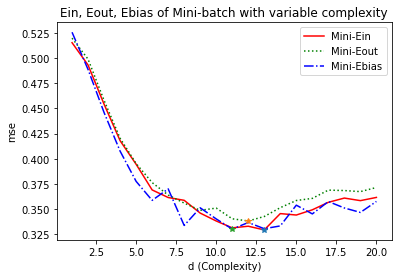

In [12]:
#variable complexity
Mini_list = [[], [], []]
for d in range(1,21):
    #t1,t2,t3 = experiment(200,0.1,d,1)
    #GD_list[0].append(t1)
    #GD_list[1].append(t2)
    #GD_list[2].append(t3)

    #t1,t2,t3 = experiment(200,0.1,d,2)
    #SGD_list[0].append(t1)
    #SGD_list[1].append(t2)
    #SGD_list[2].append(t3)

    t1,t2,t3,t4 = experiment(200,0.1,d,3)
    Mini_list[0].append(t1)
    Mini_list[1].append(t2)
    Mini_list[2].append(t3)

d = [x for x in range(1,21)]

#choose the plots as per your need

# plt.plot(d,GD_list[0],color='r',linestyle='solid',label='GD-Ein')
# plt.plot(d,GD_list[1],color='r',linestyle='dotted',label='GD-Eout')
# plt.plot(d,GD_list[2],color='r',linestyle='dashdot',label='GD-Ebias')

# plt.plot(d,SGD_list[0],color='y',linestyle='solid',label='SGD-Egen')
# plt.plot(d,SGD_list[1],color='y',linestyle='dotted',label='SGD-Ebias')
# plt.plot(d,SGD_list[2],color='y',linestyle='dashdot',label='SGD-Ebias')

plt.plot(d,Mini_list[0],color='r',linestyle='solid',label='Mini-Ein')
plt.plot(d,Mini_list[1],color='g',linestyle='dotted',label='Mini-Eout')
plt.plot(d,Mini_list[2],color='b',linestyle='dashdot',label='Mini-Ebias')

plt.plot(d[Mini_list[0].index(min(Mini_list[0]))],min(Mini_list[0]),'*')
plt.plot(d[Mini_list[1].index(min(Mini_list[1]))],min(Mini_list[1]),'*')
plt.plot(d[Mini_list[2].index(min(Mini_list[2]))],min(Mini_list[2]),'*')


plt.title('Ein, Eout, Ebias of Mini-batch with variable complexity')
plt.xlabel('d (Complexity)')
plt.ylabel('mse')
plt.legend()
plt.show()

In [14]:
N=[2,5,10,20,50,100,200]
D= [_ for _ in range(21)]
SD = [0.01,0.1,1]

results=[[[ [] for x in range(len(N))] for x in range(len(D))]for x in range(len(SD))]

for i in  range(len(N)):
    for j in range(len(D)):
        for k in range(len(SD)):
            Einav,Eoutav,Ebias,Egen = experiment(N[i],SD[k],D[j],3)
            results[i][j][k].append(Einav)
            results[i][j][k].append(Eoutav)
            results[i][j][k].append(Ebias)

print(results)

IndexError: list index out of range